## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `coinbase`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$","")
bitstamp.head()

/var/folders/s7/5vbrzq7x741_dp271_qgj7wc0000gn/T/ipykernel_56799/111025841.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype('float')
bitstamp.dtypes

/var/folders/s7/5vbrzq7x741_dp271_qgj7wc0000gn/T/ipykernel_56799/848362469.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype('float')


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$","")
coinbase.head()

/var/folders/s7/5vbrzq7x741_dp271_qgj7wc0000gn/T/ipykernel_56799/4201082999.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [12]:
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype('float')
coinbase.dtypes

/var/folders/s7/5vbrzq7x741_dp271_qgj7wc0000gn/T/ipykernel_56799/3949538195.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype('float')


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [17]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<Axes: title={'center': 'bitstamp_sliced'}, xlabel='Timestamp'>

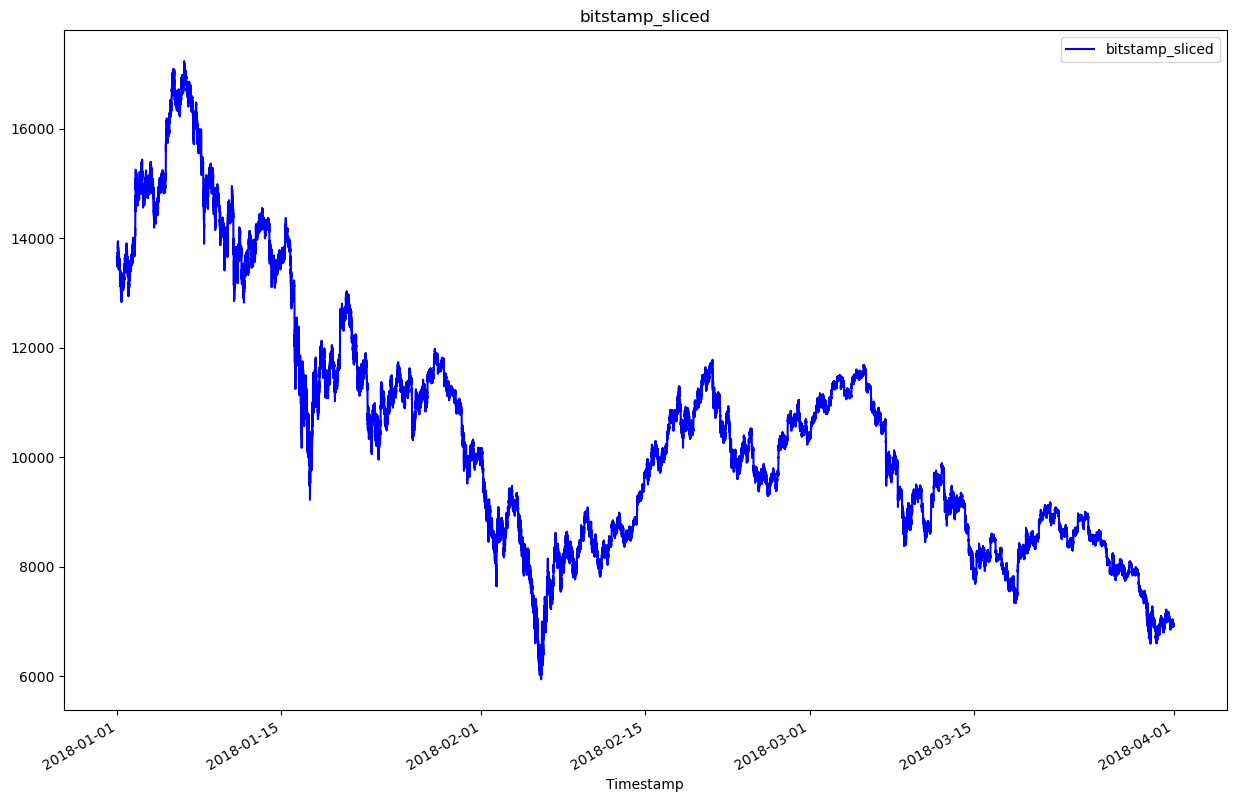

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="bitstamp_sliced", color="blue", label="bitstamp_sliced")

<Axes: title={'center': 'coinbase_sliced'}, xlabel='Timestamp'>

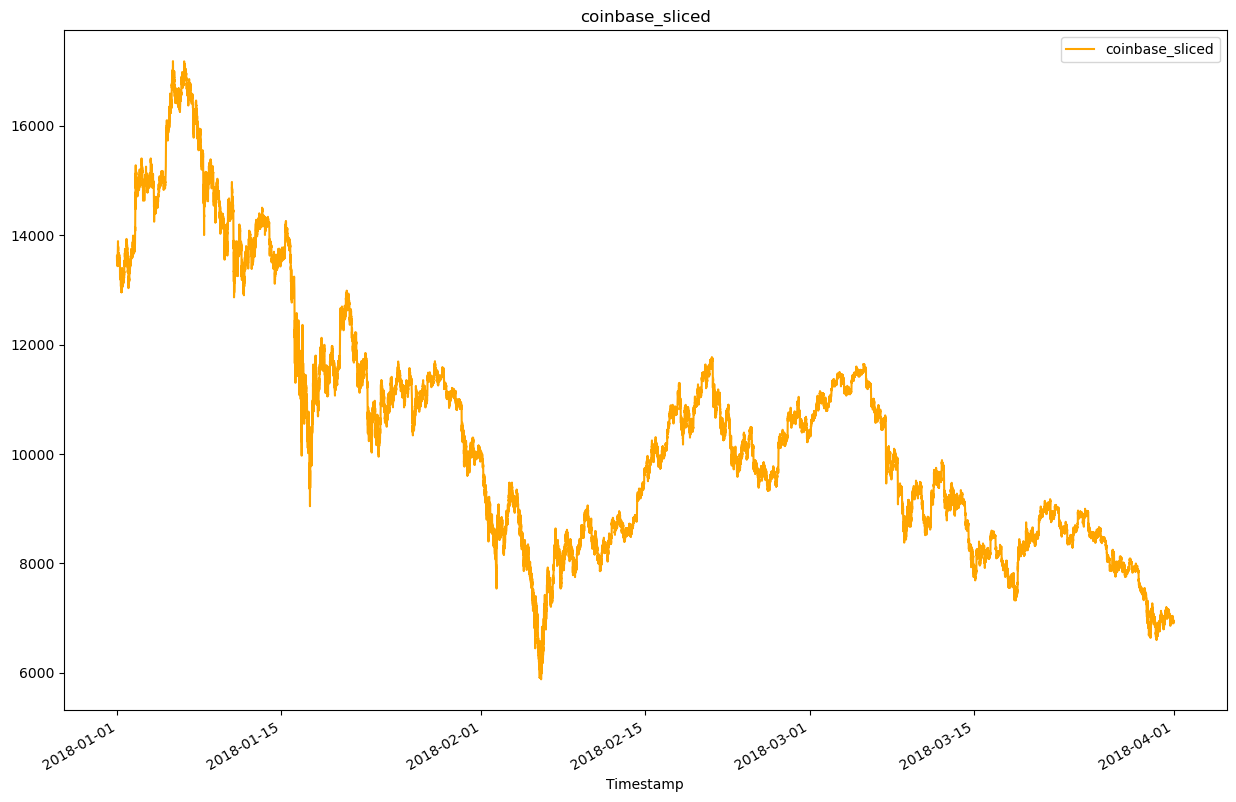

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="coinbase_sliced", color="orange", label="coinbase_sliced")

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced'}, xlabel='Timestamp'>

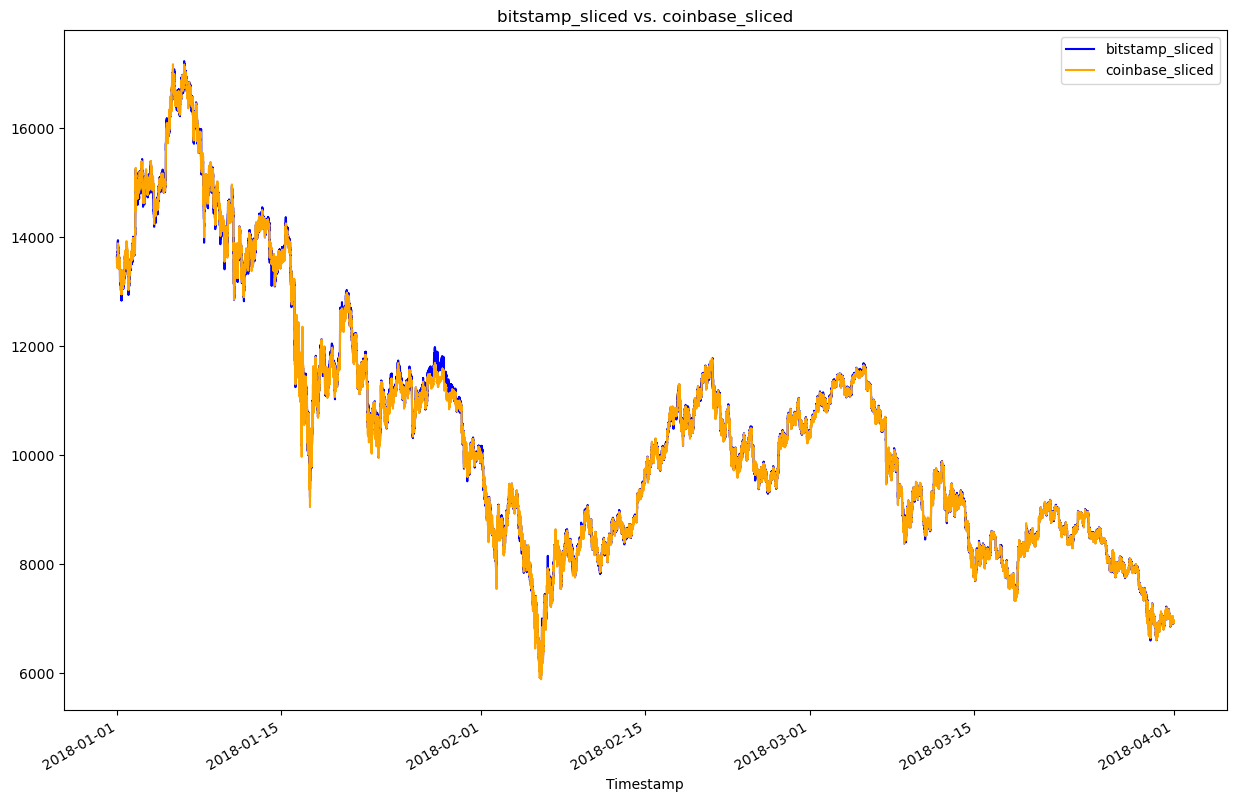

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="bitstamp_sliced vs. coinbase_sliced", color="blue", label="bitstamp_sliced")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced'}, xlabel='Timestamp'>

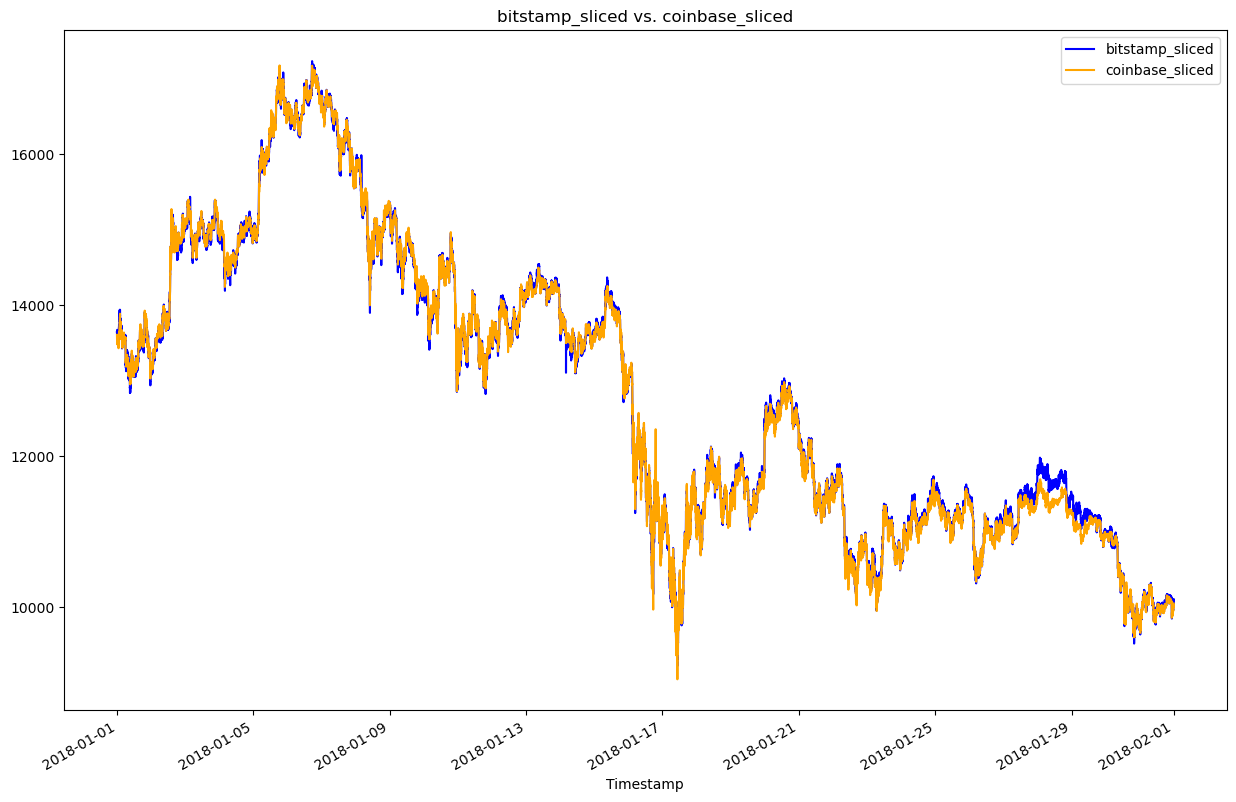

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
from_date = '2018-01-01'
to_date = '2018-01-31'
bitstamp_sliced.loc[from_date:to_date].plot(legend=True, figsize=(15, 10), title="bitstamp_sliced vs. coinbase_sliced", color="blue", label="bitstamp_sliced")
coinbase_sliced.loc[from_date:to_date].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced'}, xlabel='Timestamp'>

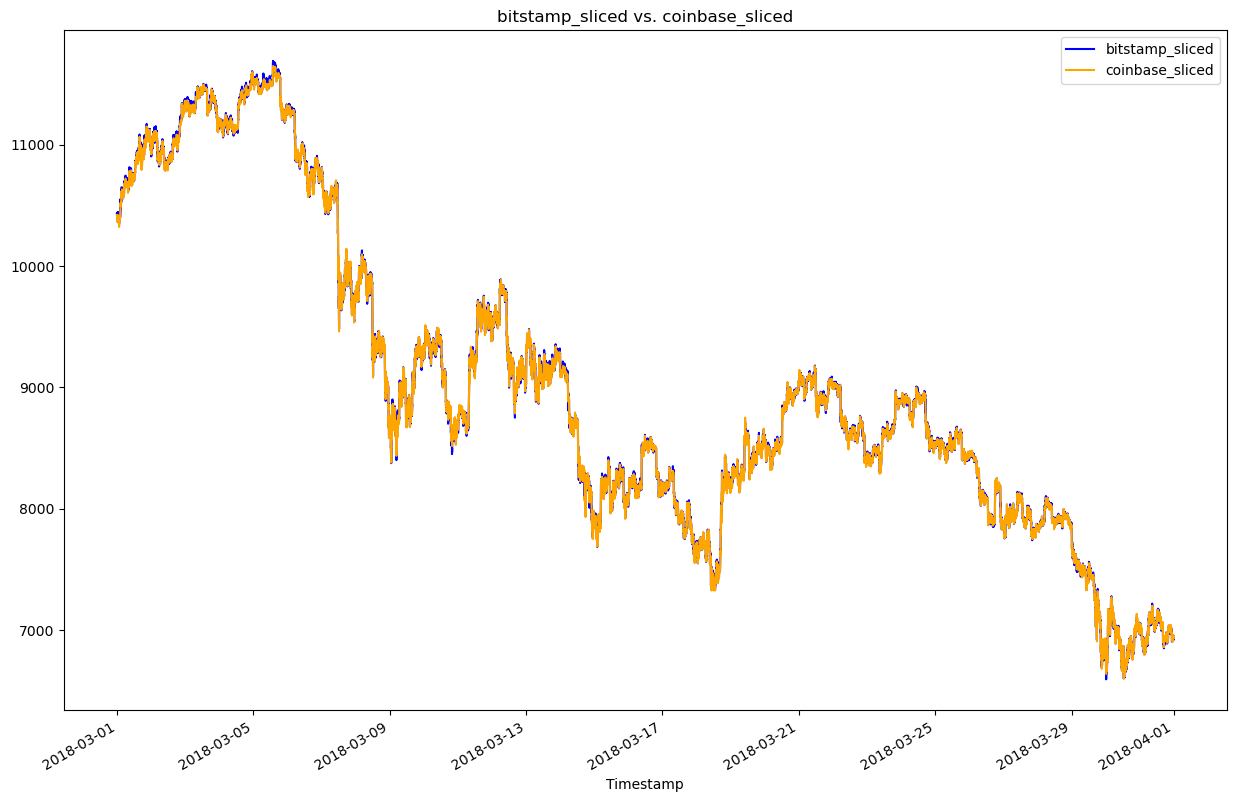

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
shorthand_for_month = '2018-03'
bitstamp_sliced.loc[shorthand_for_month].plot(legend=True, figsize=(15, 10), title="bitstamp_sliced vs. coinbase_sliced", color="blue", label="bitstamp_sliced")
coinbase_sliced.loc[shorthand_for_month].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It looks as if the spread has decreased overtime, although not by much.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced 2018-01-28'}, xlabel='Timestamp'>

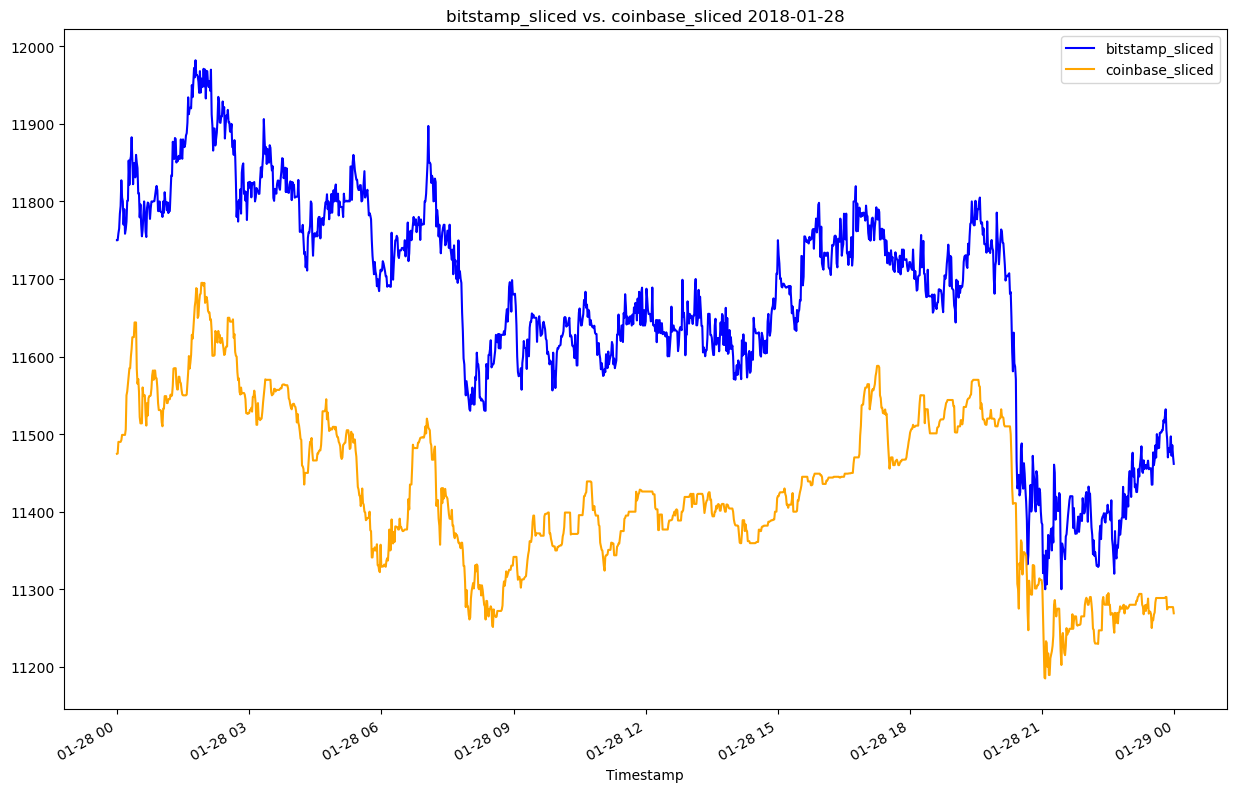

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
shorthand_for_a_day = '2018-01-28'
bitstamp_sliced.loc[shorthand_for_a_day].plot(legend=True, figsize=(15, 10), title=f"bitstamp_sliced vs. coinbase_sliced {shorthand_for_a_day}", color="blue", label="bitstamp_sliced")
coinbase_sliced.loc[shorthand_for_a_day].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc[shorthand_for_a_day] - coinbase_sliced.loc[shorthand_for_a_day]

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<Axes: >

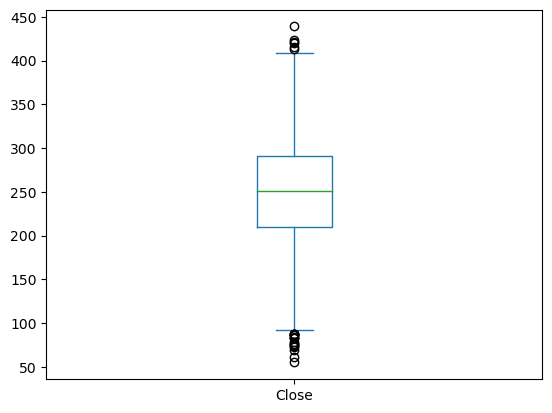

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box')

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced 2018-02-28'}, xlabel='Timestamp'>

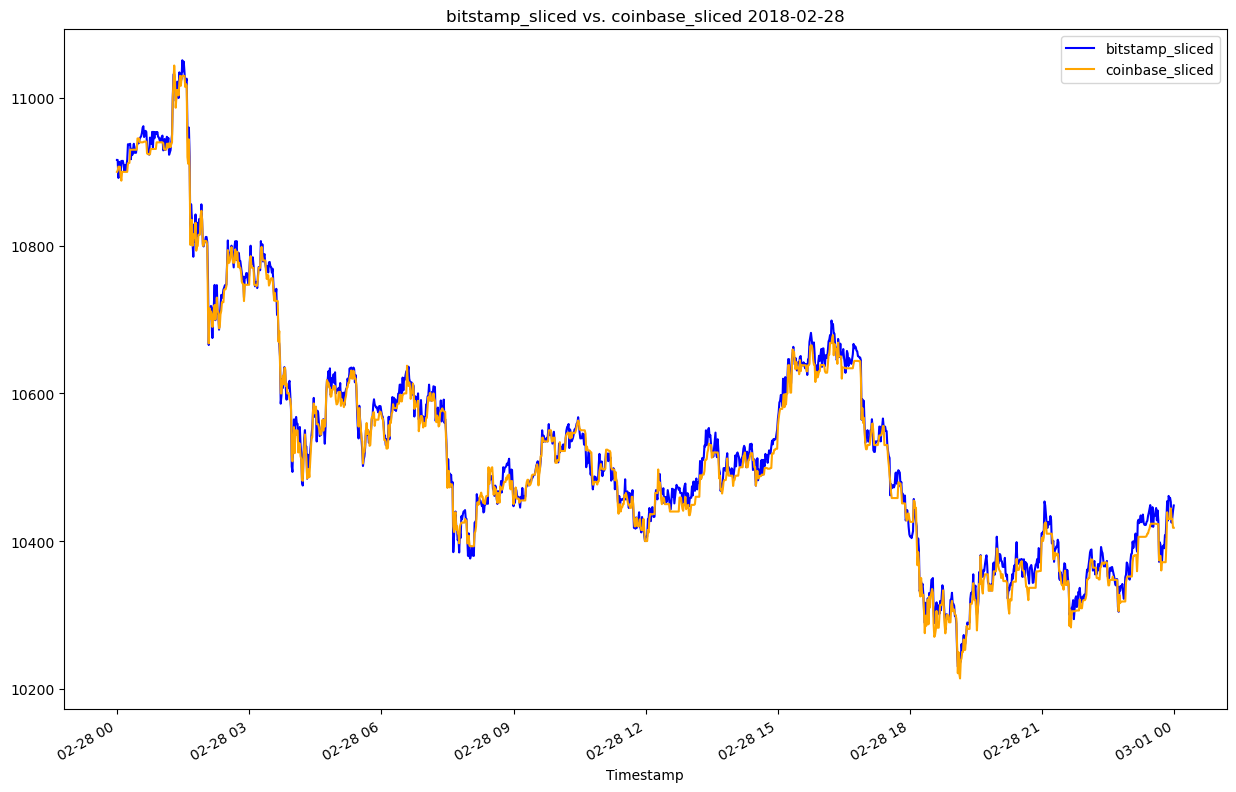

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
shorthand_for_a_day_2 = '2018-02-28'
bitstamp_sliced.loc[shorthand_for_a_day_2].plot(legend=True, figsize=(15, 10), title=f"bitstamp_sliced vs. coinbase_sliced {shorthand_for_a_day_2}", color="blue", label="bitstamp_sliced")
coinbase_sliced.loc[shorthand_for_a_day_2].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc[shorthand_for_a_day_2] - coinbase_sliced.loc[shorthand_for_a_day_2]

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1430.000000
mean        7.755825
std        11.296502
min       -35.000000
25%         0.145000
50%         7.815000
75%        15.207500
max        46.000000
Name: Close, dtype: float64

<Axes: >

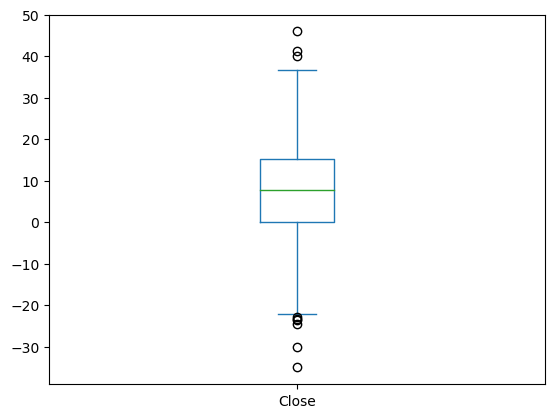

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box')

<Axes: title={'center': 'bitstamp_sliced vs. coinbase_sliced 2018-03-28'}, xlabel='Timestamp'>

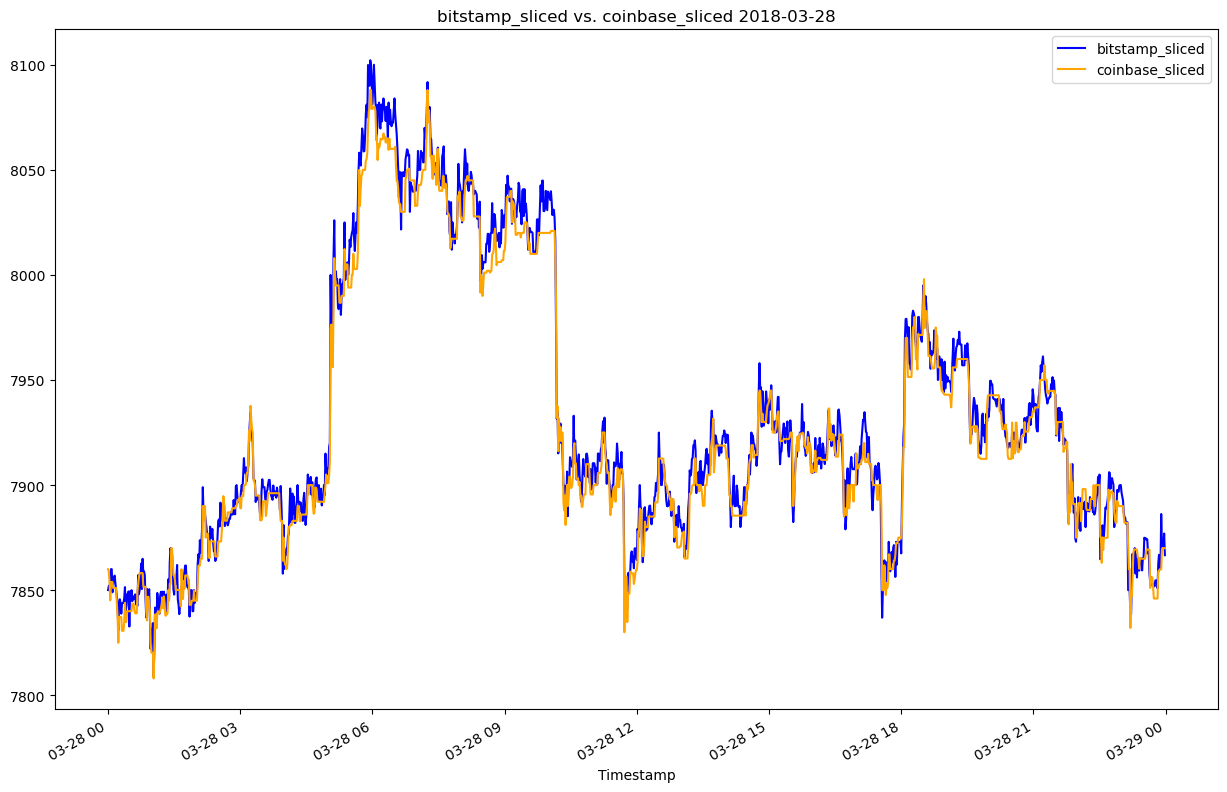

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
shorthand_for_a_day_3 = '2018-03-28'
bitstamp_sliced.loc[shorthand_for_a_day_3].plot(legend=True, figsize=(15, 10), title=f"bitstamp_sliced vs. coinbase_sliced {shorthand_for_a_day_3}", color="blue", label="bitstamp_sliced")
coinbase_sliced.loc[shorthand_for_a_day_3].plot(legend=True, figsize=(15, 10), color="orange", label="coinbase_sliced")

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc[shorthand_for_a_day_3] - coinbase_sliced.loc[shorthand_for_a_day_3]

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<Axes: >

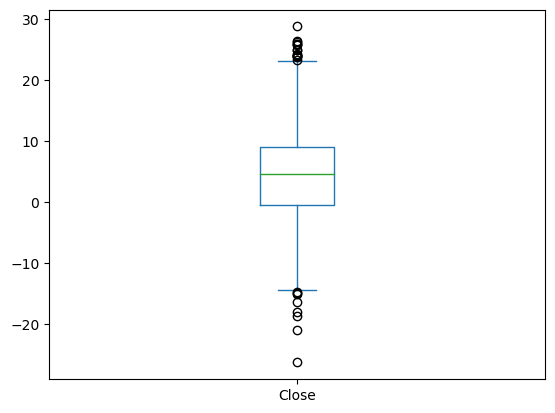

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
#initialize some variables for looping
list_of_relevant_dates = [
    shorthand_for_a_day,
    shorthand_for_a_day_2,
    shorthand_for_a_day_3
]

print(f"Relevant Dates: {list_of_relevant_dates}")

Relevant Dates: ['2018-01-28', '2018-02-28', '2018-03-28']


In [33]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spreads = {}

for relevant_date in list_of_relevant_dates:
    arbitrage_spreads[relevant_date] = {}
    arbitrage_spreads[relevant_date]['spread'] = bitstamp_sliced.loc[relevant_date] - coinbase_sliced.loc[relevant_date]
    arbitrage_spreads[relevant_date]['condition'] = arbitrage_spreads[relevant_date]['spread'] > 0 
    

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
for relevant_date in arbitrage_spreads:
    spread = arbitrage_spreads[relevant_date]['spread']
    condition = arbitrage_spreads[relevant_date]['condition']
    print(f"Date Profitable Spread: {relevant_date}")
    print(arbitrage_spreads[relevant_date]['spread'].loc[arbitrage_spreads[relevant_date]['condition']].describe())
    print("\n\n")

Date Profitable Spread: 2018-01-28
count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64



Date Profitable Spread: 2018-02-28
count    1080.000000
mean       12.486259
std         8.128835
min         0.010000
25%         6.060000
50%        11.260000
75%        17.875000
max        46.000000
Name: Close, dtype: float64



Date Profitable Spread: 2018-03-28
count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64





#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [34]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
for relevant_date in arbitrage_spreads:
    spread = arbitrage_spreads[relevant_date]['spread']
    condition = arbitrage_spreads[relevant_date]['condition']
    arbitrage_spreads[relevant_date]['return'] = arbitrage_spreads[relevant_date]['spread'].loc[arbitrage_spreads[relevant_date]['condition']] / coinbase_sliced.loc[relevant_date].loc[arbitrage_spreads[relevant_date]['condition']]
    
# Review the spread return DataFrame
# YOUR CODE HERE
for relevant_date in arbitrage_spreads:
    print(f"Date Profitable Returns: {relevant_date}")
    print(arbitrage_spreads[relevant_date]['return'].describe())
    print("\n\n")

Date Profitable Returns: 2018-01-28
count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64



Date Profitable Returns: 2018-02-28
count    1.080000e+03
mean     1.187813e-03
std      7.760206e-04
min      9.532898e-07
25%      5.767797e-04
50%      1.064639e-03
75%      1.702357e-03
max      4.431599e-03
Name: Close, dtype: float64



Date Profitable Returns: 2018-03-28
count    1028.000000
mean        0.000988
std         0.000691
min         0.000001
25%         0.000469
50%         0.000867
75%         0.001345
max         0.003560
Name: Close, dtype: float64





#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [35]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
for relevant_date in arbitrage_spreads:
    arbitrage_spreads[relevant_date]['return_after_expenses'] = arbitrage_spreads[relevant_date]['return'] - 0.01
    arbitrage_spreads[relevant_date]['postive_return_conditional'] = arbitrage_spreads[relevant_date]['return_after_expenses'] > 0
    positive_returns_after_expenses = arbitrage_spreads[relevant_date]['return_after_expenses'].loc[arbitrage_spreads[relevant_date]['postive_return_conditional']]
    print(f"Number of days with profitable return after trading expenses for {relevant_date}: {positive_returns_after_expenses.count()}")

Number of days with profitable return after trading expenses for 2018-01-28: 1378
Number of days with profitable return after trading expenses for 2018-02-28: 0
Number of days with profitable return after trading expenses for 2018-03-28: 0


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [36]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
for relevant_date in arbitrage_spreads:
    positive_returns_after_expenses = arbitrage_spreads[relevant_date]['return_after_expenses'].loc[arbitrage_spreads[relevant_date]['postive_return_conditional']]
    print(f"Date: {relevant_date}")
    print(positive_returns_after_expenses.describe())
    print("\n\n")

Date: 2018-01-28
count    1378.000000
mean        0.012201
std         0.005421
min         0.000087
25%         0.009016
50%         0.012191
75%         0.015413
max         0.028510
Name: Close, dtype: float64



Date: 2018-02-28
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64



Date: 2018-03-28
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64





#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [37]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
for relevant_date in arbitrage_spreads:
    positive_returns_after_expenses = arbitrage_spreads[relevant_date]['return_after_expenses'].loc[arbitrage_spreads[relevant_date]['postive_return_conditional']]
    profit = positive_returns_after_expenses * coinbase_sliced.loc[relevant_date].loc[arbitrage_spreads[relevant_date]['condition']].loc[arbitrage_spreads[relevant_date]['postive_return_conditional']]
    profit = profit.dropna()
    arbitrage_spreads[relevant_date]['profit_on_profitable_days'] = profit
    print(f"Date: {relevant_date}")
    print(arbitrage_spreads[relevant_date]['profit_on_profitable_days'])
    print("\n\n")

Date: 2018-01-28
Timestamp
2018-01-28 00:00:00    160.6338
2018-01-28 00:01:00    160.2500
2018-01-28 00:02:00    153.8701
2018-01-28 00:03:00    160.1301
2018-01-28 00:04:00    179.3602
                         ...   
2018-01-28 23:55:00    107.3302
2018-01-28 23:56:00     82.3402
2018-01-28 23:57:00     95.9702
2018-01-28 23:58:00     82.3502
2018-01-28 23:59:00     79.9400
Name: Close, Length: 1378, dtype: float64



Date: 2018-02-28
Series([], Name: Close, dtype: float64)



Date: 2018-03-28
Series([], Name: Close, dtype: float64)





#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [38]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
for relevant_date in arbitrage_spreads:
    print(f"Date: {relevant_date}")
    print(arbitrage_spreads[relevant_date]['profit_on_profitable_days'].describe())
    print("\n\n")

Date: 2018-01-28
count    1378.000000
mean      139.586715
std        61.887387
min         0.990000
25%       103.367650
50%       139.219950
75%       177.627500
max       325.010100
Name: Close, dtype: float64



Date: 2018-02-28
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64



Date: 2018-03-28
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64





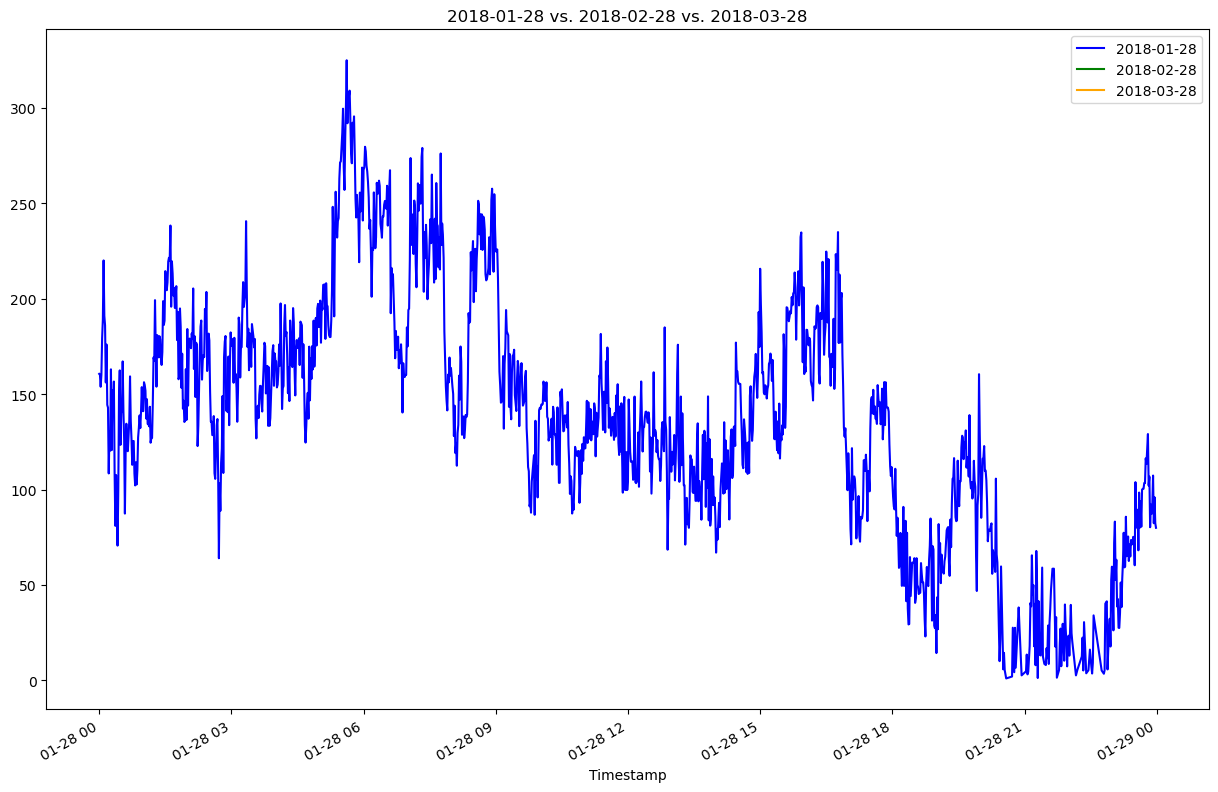

In [39]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

colors = {
    shorthand_for_a_day : 'blue',
    shorthand_for_a_day_2 : 'green',
    shorthand_for_a_day_3 : 'orange',
}

for relevant_date in arbitrage_spreads:
    arbitrage_spreads[relevant_date]['profit_on_profitable_days'].plot(legend=True, figsize=(15, 10), title=f"{' vs. '.join(arbitrage_spreads.keys())}", color=f"{colors[relevant_date]}", label=f"{relevant_date}")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [40]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
for relevant_date in arbitrage_spreads:
    sum_of_profits_for_date = arbitrage_spreads[relevant_date]['profit_on_profitable_days'].sum()
    print(f"Total potential profits on day {relevant_date} was {sum_of_profits_for_date}")
    print("\n")

Total potential profits on day 2018-01-28 was 192350.4936000001


Total potential profits on day 2018-02-28 was 0.0


Total potential profits on day 2018-03-28 was 0.0




#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

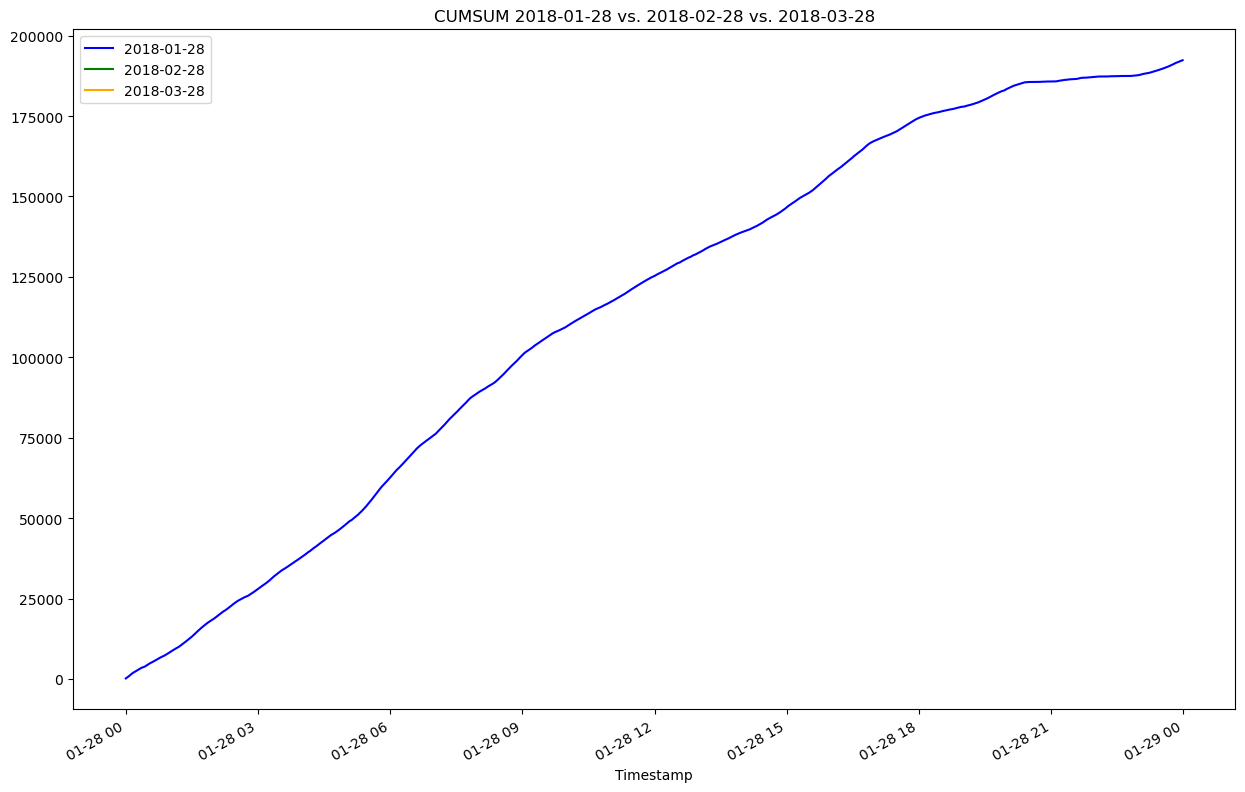

In [41]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
for relevant_date in arbitrage_spreads:
    arbitrage_spreads[relevant_date]['profit_on_profitable_days'].cumsum().plot(legend=True, figsize=(15, 10), title=f"CUMSUM {' vs. '.join(arbitrage_spreads.keys())}", color=f"{colors[relevant_date]}", label=f"{relevant_date}")

<Axes: title={'center': 'CUMSUM Date=2018-01-28'}, xlabel='Timestamp'>

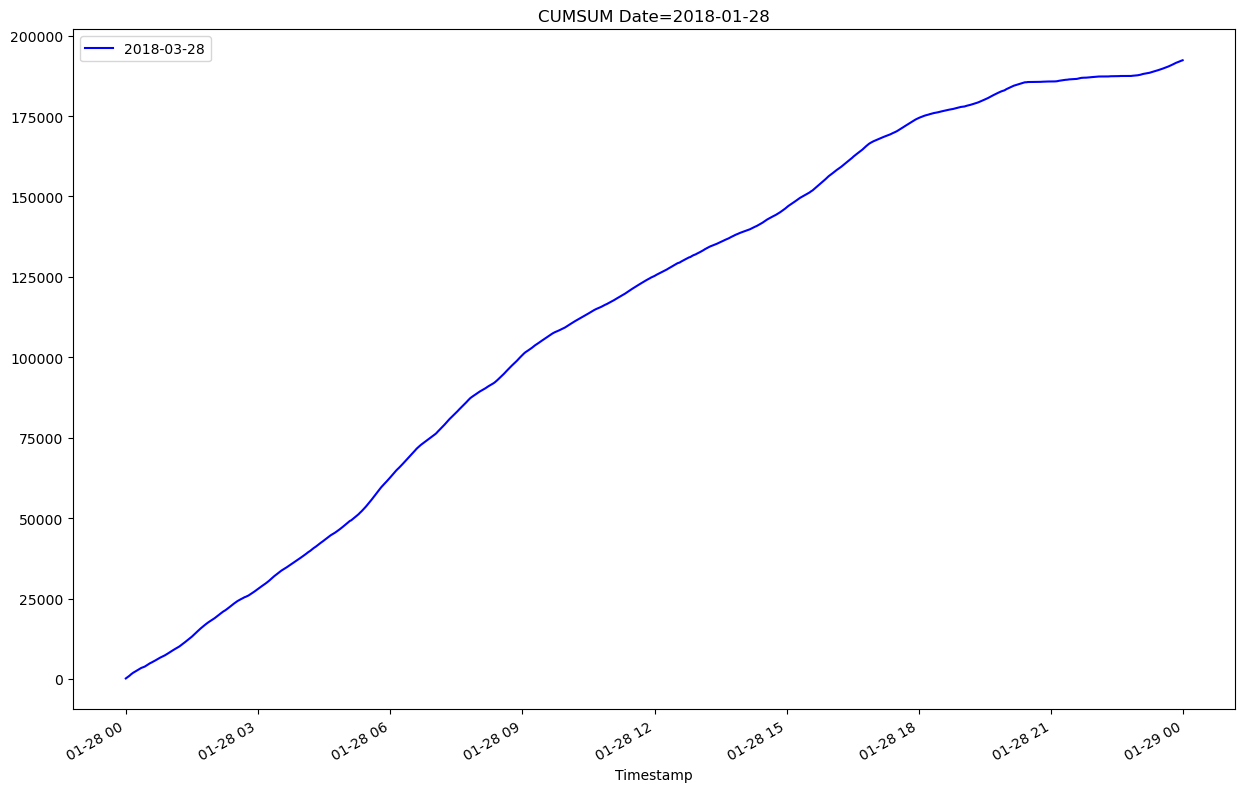

In [42]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
arbitrage_spreads[shorthand_for_a_day]['profit_on_profitable_days'].cumsum().plot(legend=True, figsize=(15, 10), title=f"CUMSUM Date={shorthand_for_a_day}", color=f"{colors[shorthand_for_a_day]}", label=f"{relevant_date}")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** For the days that I picked only the early date of 01-28 had any profitable arbitrage trades between bitmap and coinbase. The arbitrage opportunity quickly closed. If I had chosen an earlier day in the month, for each month, the middle date may also have had some profitable trades.